<a href="https://colab.research.google.com/github/saudjabarali/Fraudulent-Credit-Card-Detection/blob/main/real_time_query_processing_and_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|       director|                cast|      country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|Kirsten Johnson|                NULL|United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|           NULL|Ama Qamata, Khosi...| South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglands|Julien Leclercq|Sami Bouajila, Tr...|         NULL|Septem

/tmp/ipython-input-79629049.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='count', data=type_pd, palette="pastel")


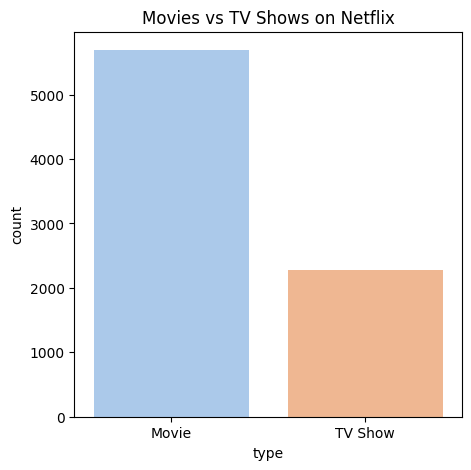

/tmp/ipython-input-79629049.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country', x='count', data=country_pd, palette="magma")


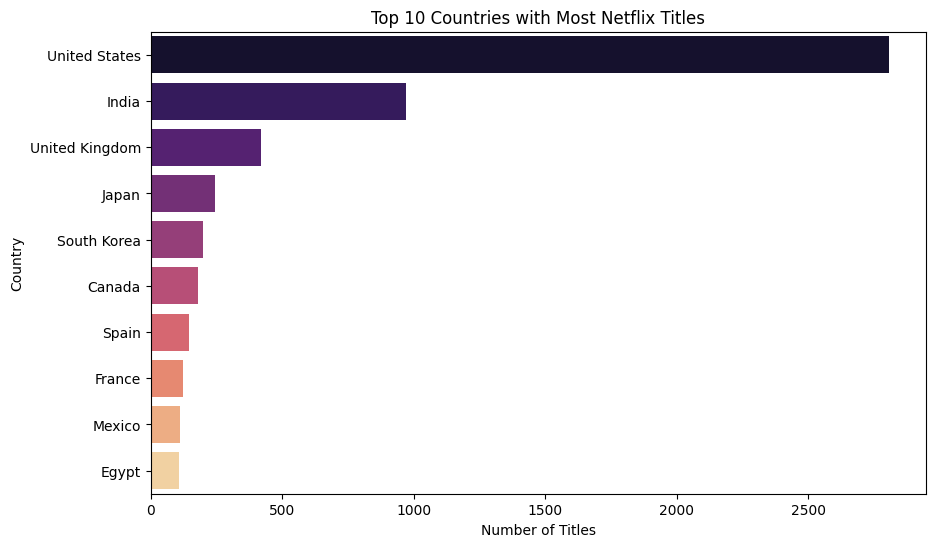

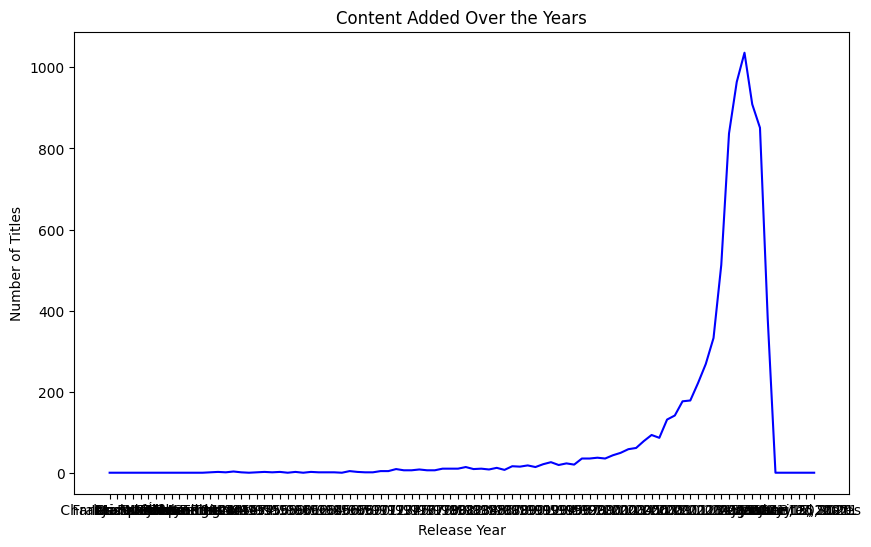

/tmp/ipython-input-79629049.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='count', data=rating_pd, palette="coolwarm")


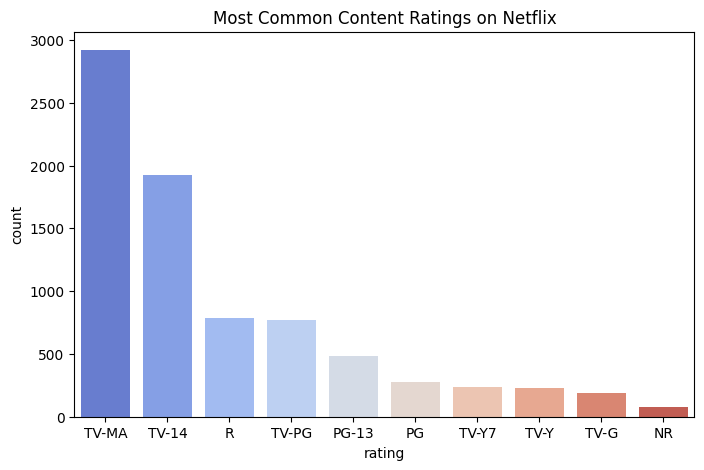

/tmp/ipython-input-79629049.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='count', data=genre_pd, palette="viridis")


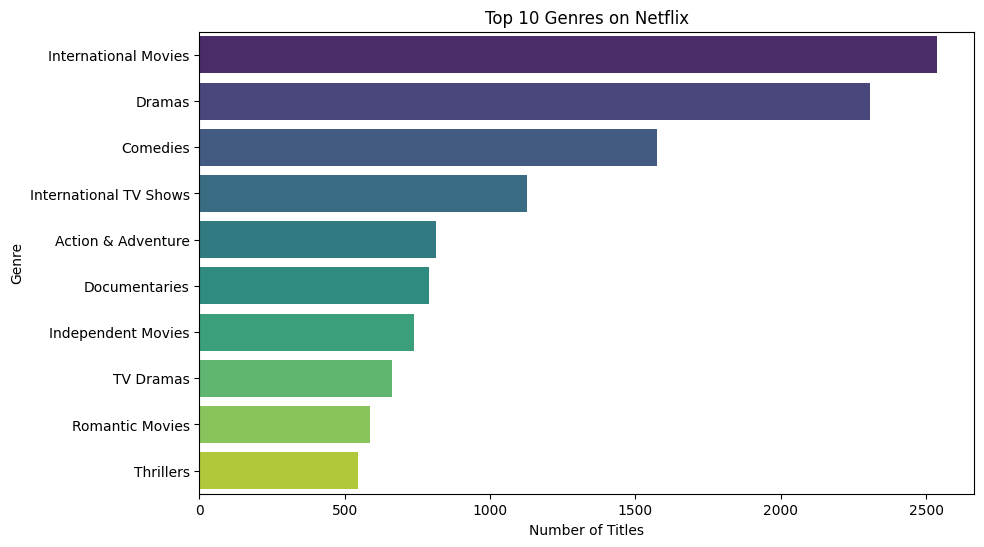

In [ ]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, year, desc
import matplotlib.pyplot as plt
import seaborn as sns
spark = SparkSession.builder.appName("Netflix Data Analysis").getOrCreate()
df = spark.read.csv("/content/drive/My Drive/netflix_titles.csv", header=True, inferSchema=True)
df.show(5)
df.printSchema()
# Remove null rows in important columns
df = df.dropna(subset=["type", "title", "country", "release_year", "rating"])

# Drop duplicates
df = df.dropDuplicates()

# Show cleaned data
print("Total records after cleaning:", df.count())
type_count = df.groupBy("type").agg(count("*").alias("count")).orderBy(desc("count"))
type_count.show()
country_count = df.groupBy("country").agg(count("*").alias("count")).orderBy(desc("count"))
country_count.show(10)
year_trend = df.groupBy("release_year").agg(count("*").alias("count")).orderBy("release_year")
year_trend.show(10)
rating_count = df.groupBy("rating").agg(count("*").alias("count")).orderBy(desc("count"))
rating_count.show(10)
from pyspark.sql.functions import split, explode, trim

genre_split = df.withColumn("genre", explode(split(col("listed_in"), ",")))
genre_split = genre_split.withColumn("genre", trim(col("genre")))
genre_count = genre_split.groupBy("genre").agg(count("*").alias("count")).orderBy(desc("count"))
genre_count.show(10)
type_pd = type_count.toPandas()
country_pd = country_count.limit(10).toPandas()
year_pd = year_trend.toPandas()
rating_pd = rating_count.limit(10).toPandas()
genre_pd = genre_count.limit(10).toPandas()
plt.figure(figsize=(5,5))
sns.barplot(x='type', y='count', data=type_pd, palette="pastel")
plt.title("Movies vs TV Shows on Netflix")
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(y='country', x='count', data=country_pd, palette="magma")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()
plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='count', data=year_pd, color='b')
plt.title("Content Added Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x='rating', y='count', data=rating_pd, palette="coolwarm")
plt.title("Most Common Content Ratings on Netflix")
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(y='genre', x='count', data=genre_pd, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()
spark.stop()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, year, desc
import matplotlib.pyplot as plt
import seaborn as sns
spark = SparkSession.builder.appName("Netflix Data Analysis").getOrCreate()
df = spark.read.csv("netflix_titles.csv", header=True, inferSchema=True)
df.show(5)
df.printSchema()
# Remove null rows in important columns
df = df.dropna(subset=["type", "title", "country", "release_year", "rating"])

# Drop duplicates
df = df.dropDuplicates()

# Show cleaned data
print("Total records after cleaning:", df.count())
type_count = df.groupBy("type").agg(count("*").alias("count")).orderBy(desc("count"))
type_count.show()
country_count = df.groupBy("country").agg(count("*").alias("count")).orderBy(desc("count"))
country_count.show(10)
year_trend = df.groupBy("release_year").agg(count("*").alias("count")).orderBy("release_year")
year_trend.show(10)
rating_count = df.groupBy("rating").agg(count("*").alias("count")).orderBy(desc("count"))
rating_count.show(10)
from pyspark.sql.functions import split, explode, trim

genre_split = df.withColumn("genre", explode(split(col("listed_in"), ",")))
genre_split = genre_split.withColumn("genre", trim(col("genre")))
genre_count = genre_split.groupBy("genre").agg(count("*").alias("count")).orderBy(desc("count"))
genre_count.show(10)
type_pd = type_count.toPandas()
country_pd = country_count.limit(10).toPandas()
year_pd = year_trend.toPandas()
rating_pd = rating_count.limit(10).toPandas()
genre_pd = genre_count.limit(10).toPandas()
plt.figure(figsize=(5,5))
sns.barplot(x='type', y='count', data=type_pd, palette="pastel")
plt.title("Movies vs TV Shows on Netflix")
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(y='country', x='count', data=country_pd, palette="magma")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()
plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='count', data=year_pd, color='b')
plt.title("Content Added Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x='rating', y='count', data=rating_pd, palette="coolwarm")
plt.title("Most Common Content Ratings on Netflix")
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(y='genre', x='count', data=genre_pd, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()
spark.stop()


